<a href="https://colab.research.google.com/github/rc1inger/CSC177-DataPreprocessing/blob/main/part_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (b) Regression

In [6]:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import pydotplus
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_text

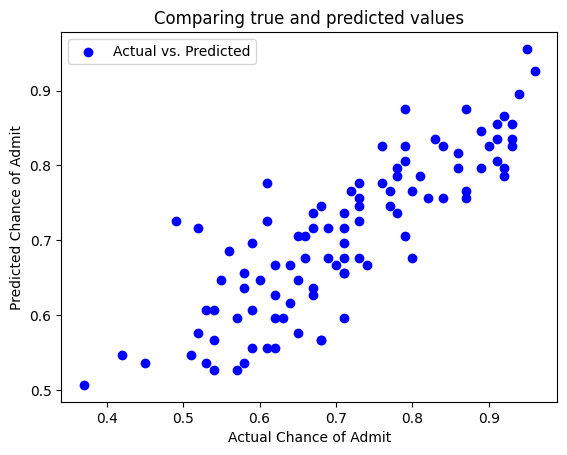

Mean Squared Error: 0.005
R-squared: 0.709


In [7]:
# Read the file
path = "./sample_data"
filename = "Admission_Predict_Ver1.1_small_data_set_for_Linear_Regression.csv"
filename_read = os.path.join(path, filename)
df = pd.read_csv(filename_read, na_values=['NA', '?'])
df.columns = ['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance of Admit']


x = df[['GRE Score']]
y = df[['Chance of Admit']]

numTrain = int(len(x) * 0.8)
x_train = x[:numTrain]
x_test = x[numTrain:]
y_train = y[:numTrain]
y_test = y[numTrain:]

# Create linear regression object and fit to training set
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

# Make predictions on the test set
y_pred = regr.predict(x_test)

# Visualization
plt.scatter(y_test, y_pred, color='blue', label="Actual vs. Predicted")
plt.xlabel('Actual Chance of Admit')
plt.ylabel('Predicted Chance of Admit')
plt.title("Comparing true and predicted values")
plt.legend()
plt.show()

# Evaluate
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.3f}")
print(f"R-squared: {r2_score(y_test, y_pred):.3f}")


# (b) Classification

Classification Report:
               precision    recall  f1-score   support

         Low       0.72      0.68      0.70        34
      Medium       0.68      0.69      0.68        39
        High       0.89      0.93      0.91        27

    accuracy                           0.75       100
   macro avg       0.76      0.76      0.76       100
weighted avg       0.75      0.75      0.75       100


Valuable Rules:
1. If CGPA > 0.64 and GRE Score > 0.16, then the Chance of Admit is high (class 2).
2. If CGPA <= 0.64, TOEFL Score <= -0.63, and Research is 0, then the Chance of Admit is low (class 0).
3. If CGPA <= -0.53, GRE Score <= 0.30, and SOP is below average (-1.14), then the Chance of Admit is low (class 0).



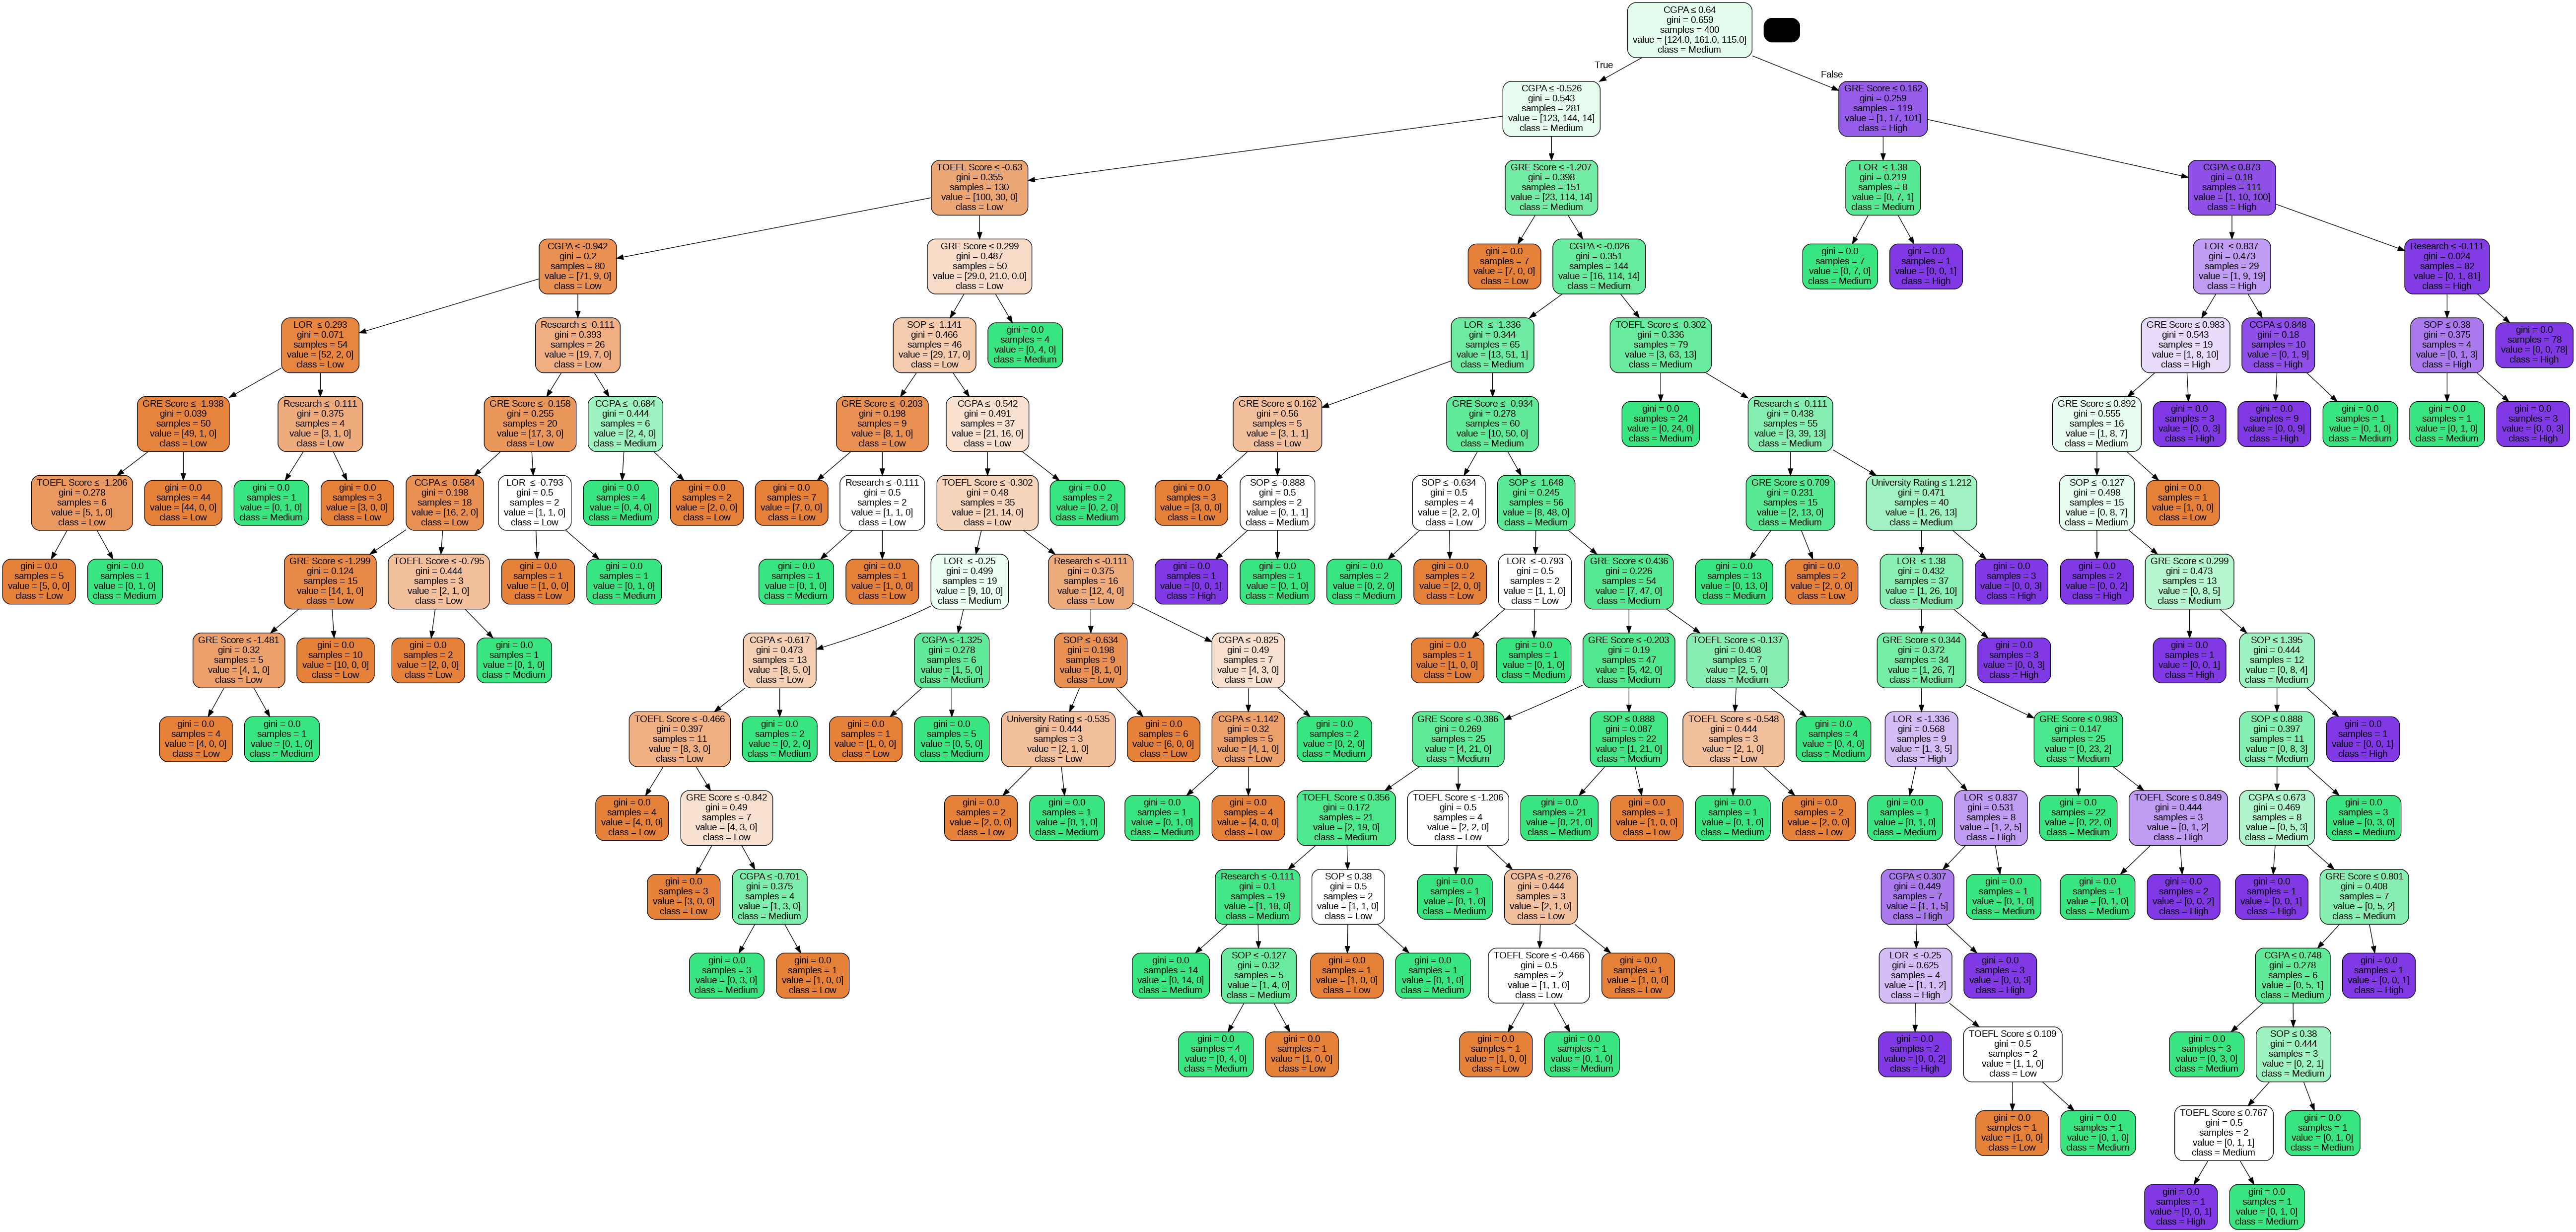

In [8]:
# Loading the dataset
data = pd.read_csv('./sample_data/Admission_Predict_Ver1.1_small_data_set_for_Linear_Regression.csv')

# Dropping irrelevant column
# as it's not required for this part
data = data.drop(columns=["Serial No."])

# Discretizing the "Chance of Admit" column into three classes
#low, medium, and high
bins = [0, 0.65, 0.80, 1.0]
labels = [0, 1, 2]  # 0: Low, 1: Medium, 2: High chances of admission
data['Chance of Admit Class'] = pd.cut(data["Chance of Admit "], bins=bins, labels=labels, include_lowest=True)

# new target variable
X = data.drop(columns=["Chance of Admit ", "Chance of Admit Class"])
y = data["Chance of Admit Class"].astype(int)  # Convert to integer type

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Training Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)
# Predict on the test set
y_pred_class = clf.predict(X_test_scaled)

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred_class, target_names=["Low", "Medium", "High"]))
# Initialize StringIO to capture the dot data
dot_data = StringIO()

feature_cols = X.columns  # Feature column names from X

#rules
print("\nValuable Rules:")
print("1. If CGPA > 0.64 and GRE Score > 0.16, then the Chance of Admit is high (class 2).")
print("2. If CGPA <= 0.64, TOEFL Score <= -0.63, and Research is 0, then the Chance of Admit is low (class 0).")
print("3. If CGPA <= -0.53, GRE Score <= 0.30, and SOP is below average (-1.14), then the Chance of Admit is low (class 0).\n")

export_graphviz(
    clf,
    out_file=dot_data,
    filled=True,
    rounded=True,
    special_characters=True,
    feature_names=feature_cols,
    class_names=["Low", "Medium", "High"]
)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

graph.write_png("classification_tree.png")
Image(graph.create_png())

